# Novas perguntas do CEO (Aula 03)

In [8]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [15]:
data = pd.read_csv('datasets/kc_house_data.csv')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [19]:
#1. Crie uma nova coluna chamada: "dormitory_type"
##- Se o valor da coluna "bedrooms" for igual à 1 -> 'studio'
##- Se o valor da coluna "bedrooms" for igual à 2 -> 'apartment'
##- Se o valor da coluna "bedrooms" for maior que 2-> 'house'

data['dorm_type'] = 'house'
data.loc[data['bedrooms']==1, 'dorm_type'] = 'studio'
data.loc[data['bedrooms']==2, 'dorm_type'] = 'apartment'
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dorm_type
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,house
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,house
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,apartment
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,house
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,house


In [20]:
#2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos
from matplotlib import pyplot as plt
from matplotlib import gridspec

<BarContainer object of 13 artists>

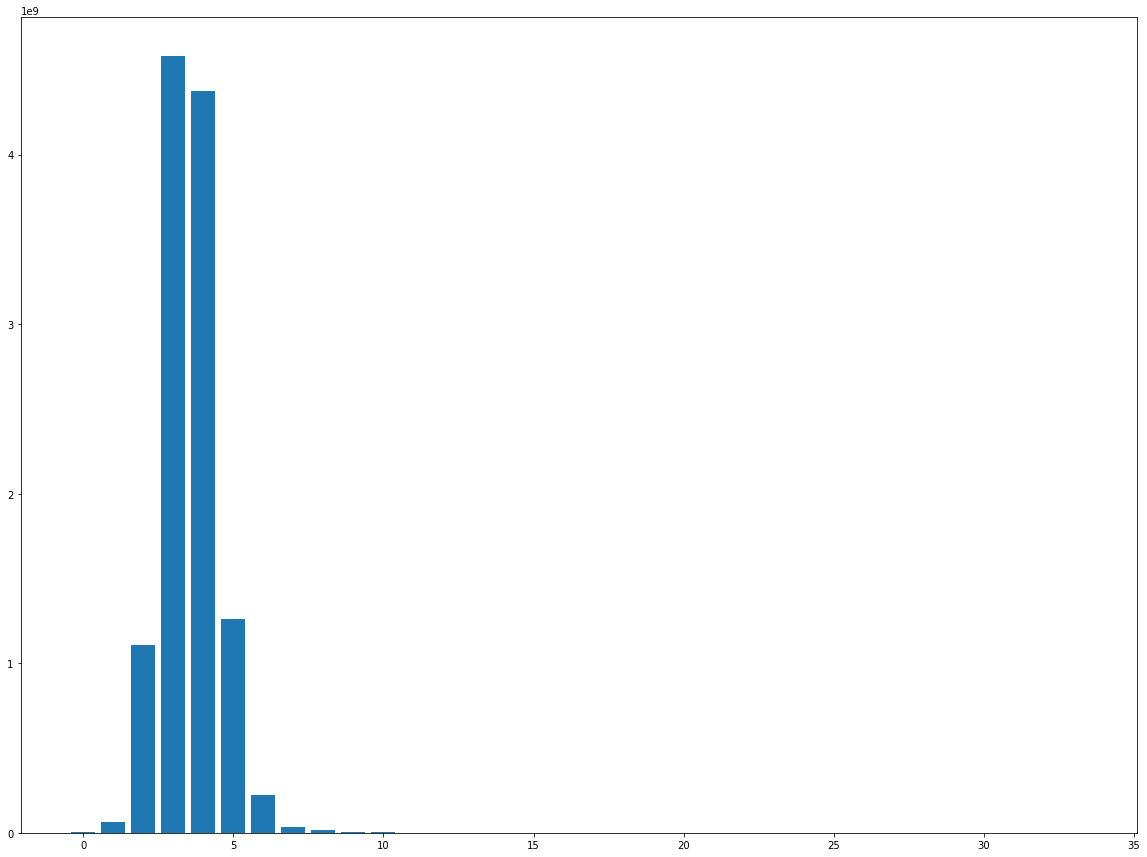

In [23]:
by_bed = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

plt.figure(figsize=(20,15))
plt.bar(by_bed['bedrooms'], by_bed['price'])

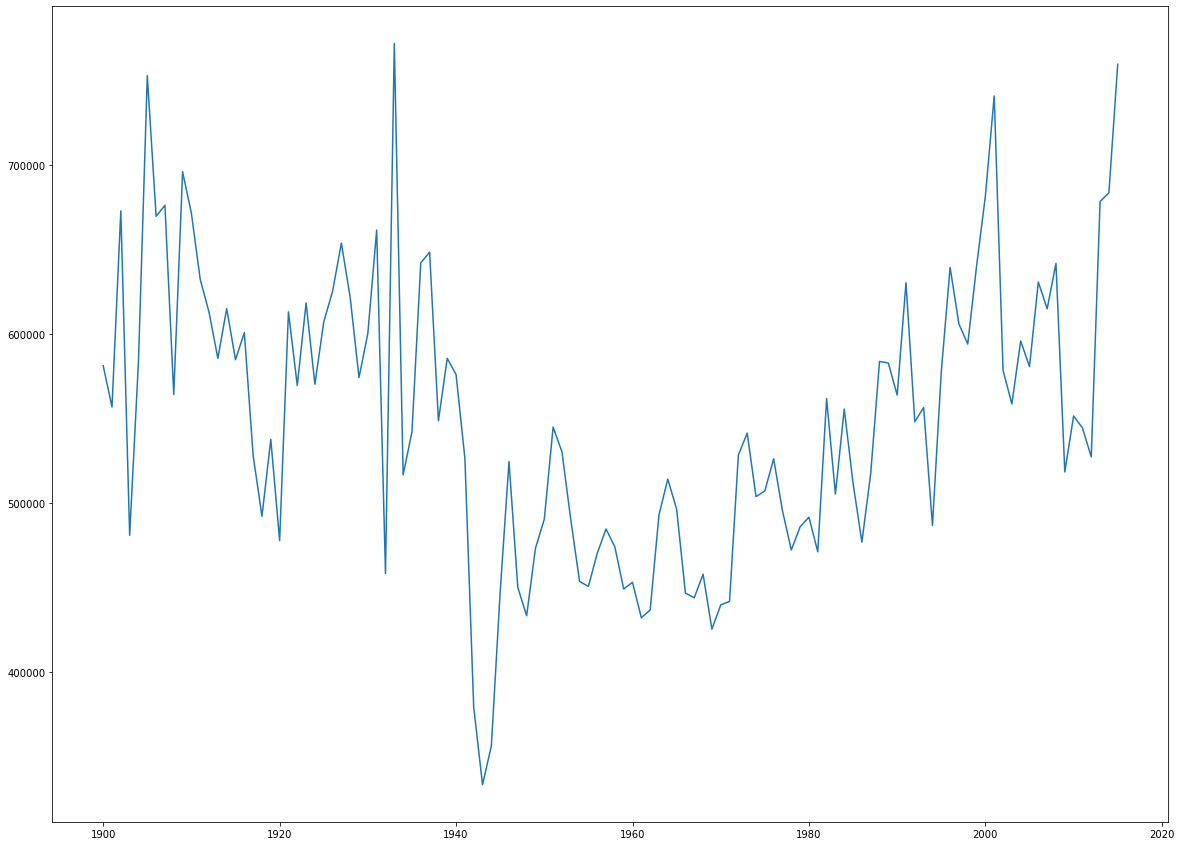

In [24]:
#3. Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis
by_yrbuilt = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

plt.figure(figsize=(20,15))
plt.plot(by_yrbuilt['yr_built'], by_yrbuilt['price'])

<BarContainer object of 3 artists>

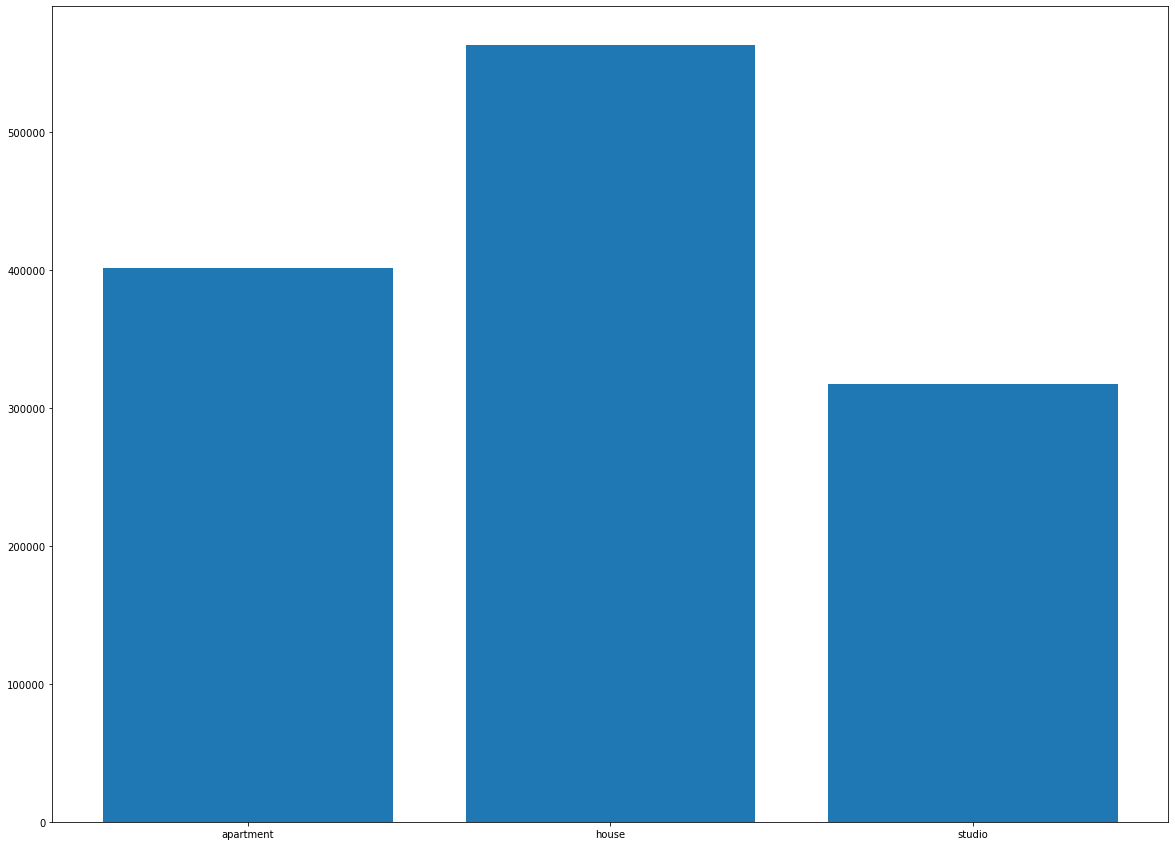

In [26]:
#4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios
by_dorm = data[['price', 'dorm_type']].groupby('dorm_type').mean().reset_index()

plt.figure(figsize=(20,15))
plt.bar(by_dorm['dorm_type'], by_dorm['price'])

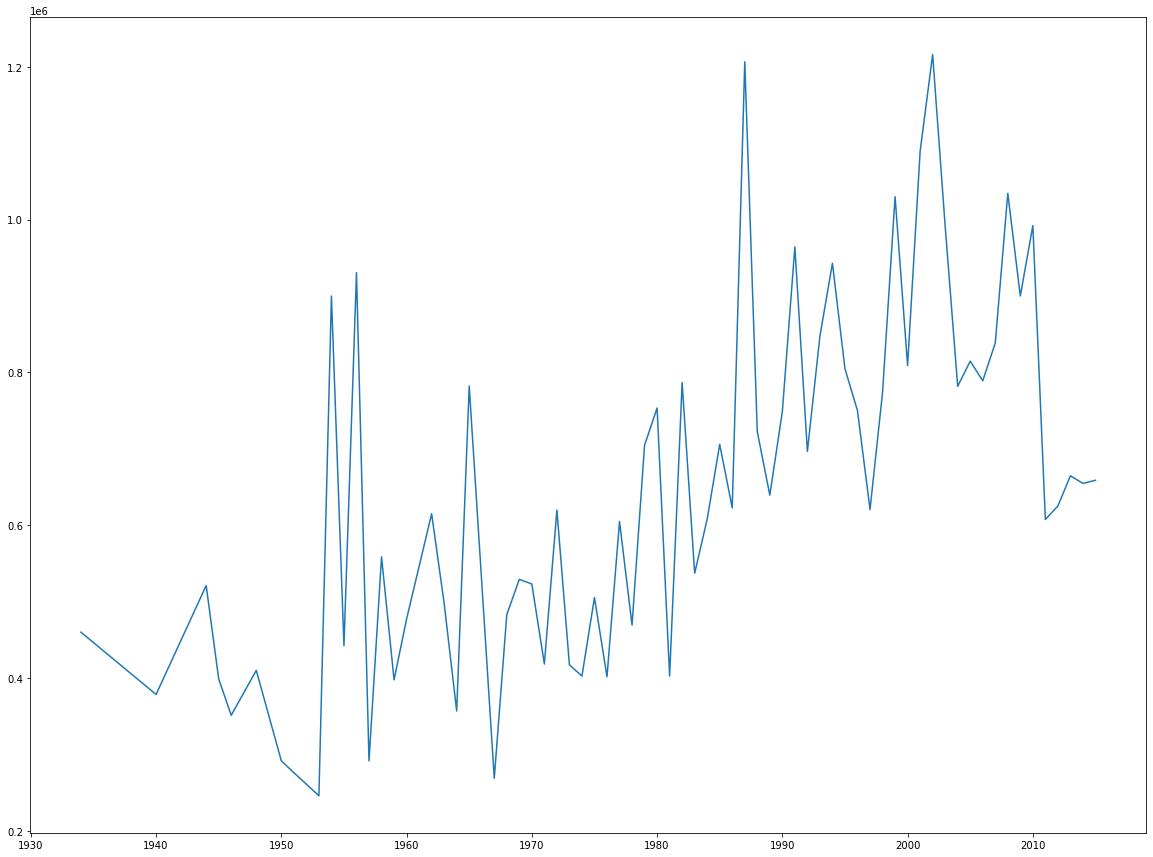

In [28]:
#5. Faça um gráfico de linhas que mostre a evolução da média dos preços
##pelo ano da reforma dos imóveis, a partir do ano de 1930.
a = data.loc[(data['yr_renovated']>1930) & (data['price']>0)]

by_yreno = a [['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()

plt.figure(figsize=(20,15))
plt.plot(by_yreno['yr_renovated'], by_yreno['price'])

In [29]:
#6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitório dos imóveis
data[['price', 'yr_built', 'dorm_type']].groupby(['yr_built', 'dorm_type']).mean().reset_index()

,yr_built,dorm_type,price
0,1900,apartment,589533.33
1,1900,house,584854.27
2,1900,studio,398944.00
3,1901,apartment,452856.40
4,1901,house,578619.17
...,...,...,...
300,2014,house,692687.72
301,2014,studio,516500.00
302,2015,apartment,543250.00
303,2015,house,797383.06


<BarContainer object of 3 artists>

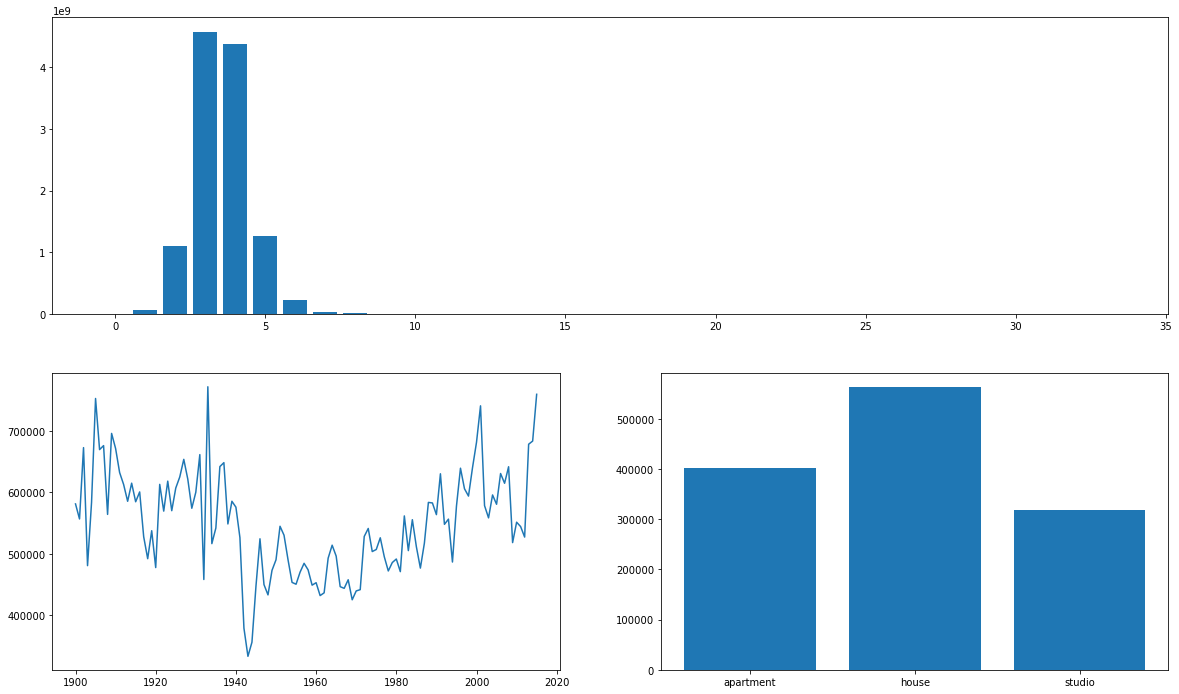

In [34]:
#7. Crie um dashboard com os gráficos das questões 02,03,04 (Dashboard: 1 linha e 2 colunas)

fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, 0])
ax3 = fig.add_subplot(specs[1, 1])

#Graph - 02
by_bed = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

ax1.bar(by_bed['bedrooms'], by_bed['price'])


#Graph - 03
by_yrbuilt = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

ax2.plot(by_yrbuilt['yr_built'], by_yrbuilt['price'])


#Graph - 04
by_dorm = data[['price', 'dorm_type']].groupby('dorm_type').mean().reset_index()

ax3.bar(by_dorm['dorm_type'], by_dorm['price'])

<BarContainer object of 3 artists>

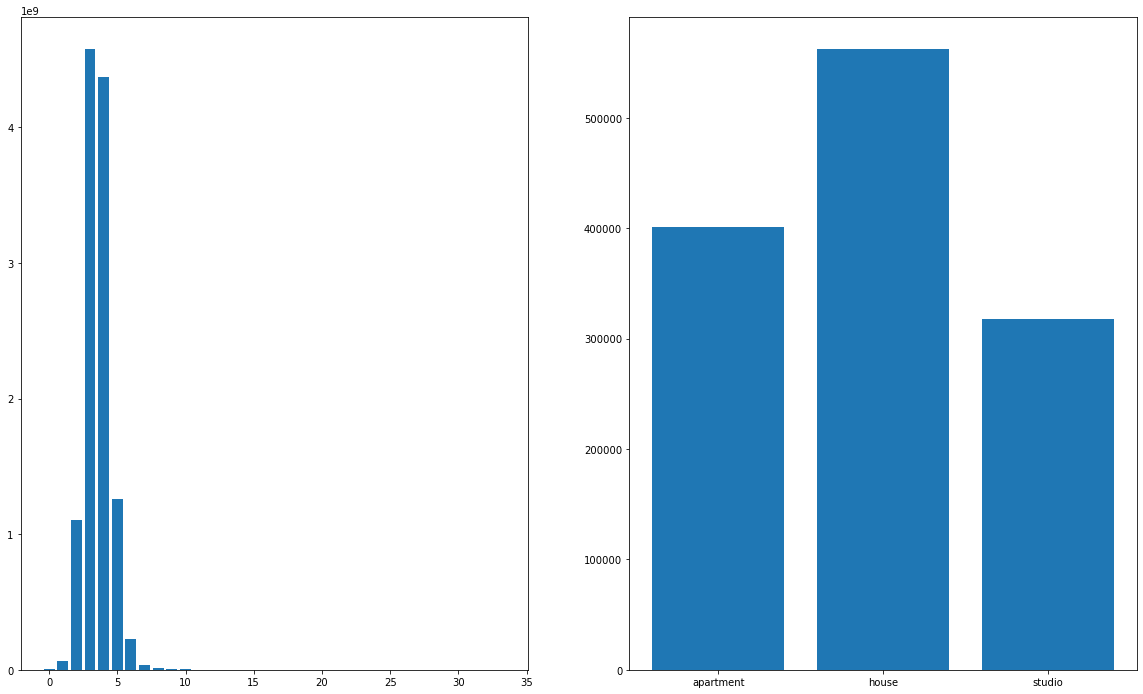

In [49]:
#8. Crie um dashboard com os gráficos das questões 02,04 (Dashboard: 2 colunas)

fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec( ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[:, 0])
ax2 = fig.add_subplot(specs[:, 1])

#Graph - 02
by_bed = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

ax1.bar(by_bed['bedrooms'], by_bed['price'])


#Graph - 04
by_dorm = data[['price', 'dorm_type']].groupby('dorm_type').mean().reset_index()

ax2.bar(by_dorm['dorm_type'], by_dorm['price'])

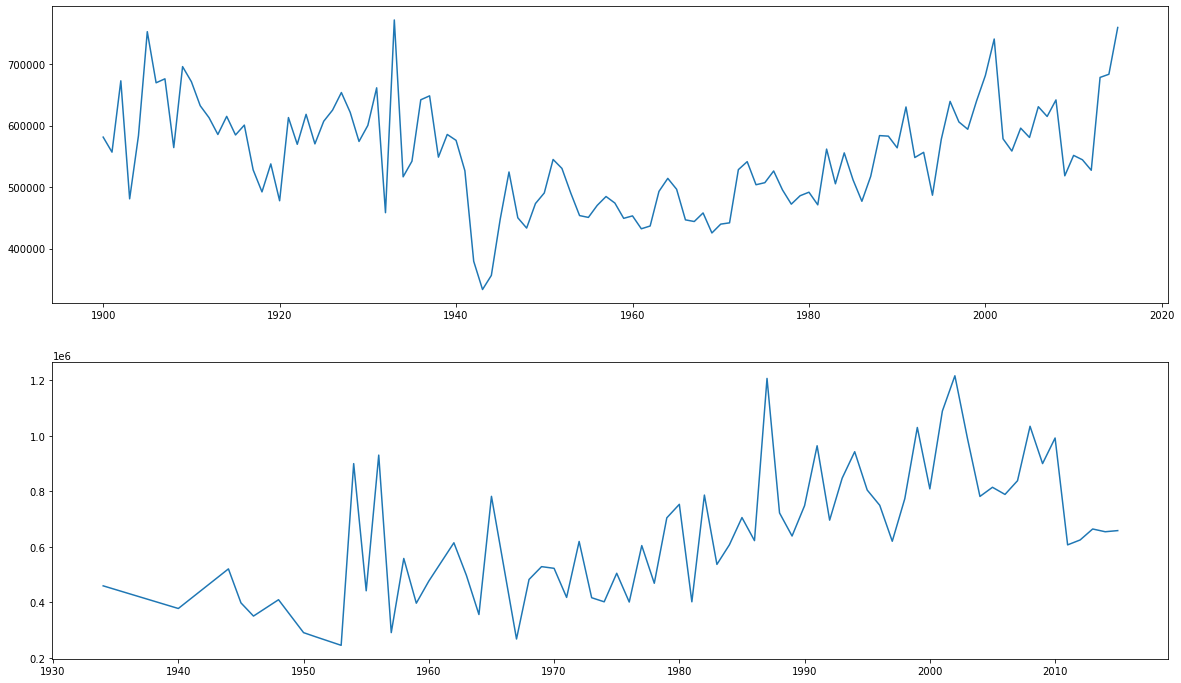

In [48]:
#9. Crie um dashboard com os ráficos das questões 03,05 (Dashboard: 2 linhas)
fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec( ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, :])

#Graph - 03
by_yrbuilt = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

ax1.plot(by_yrbuilt['yr_built'], by_yrbuilt['price'])

#Graph - 05
a = data.loc[(data['yr_renovated']>1930) & (data['price']>0)]

by_yreno = a [['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()

ax2.plot(by_yreno['yr_renovated'], by_yreno['price'])

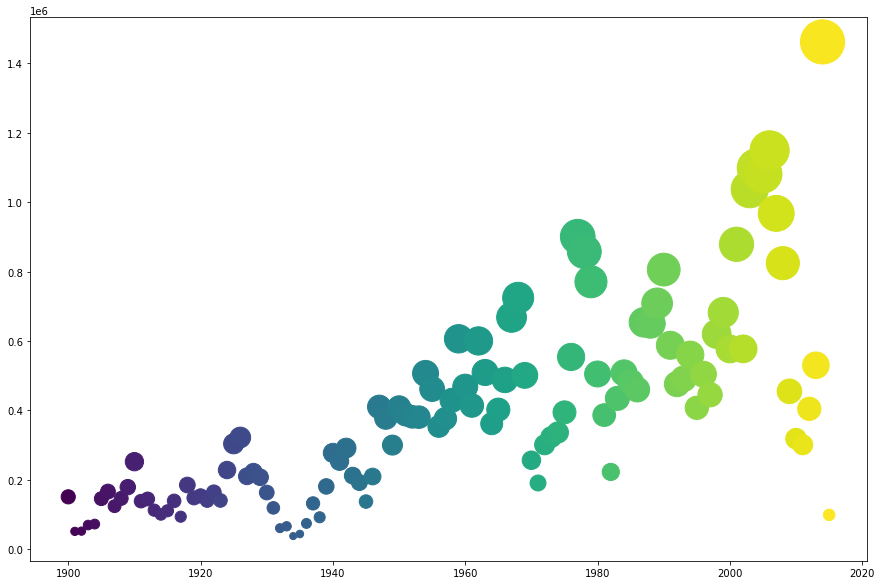

In [46]:
#10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar
by_living = data[['sqft_living', 'yr_built']].groupby('yr_built').sum().reset_index()

plt.figure(figsize=(15,10))
plt.scatter(by_living['yr_built'], by_living['sqft_living'], c = by_living['yr_built'], s = by_living['sqft_living'] / 750)